In [21]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chisquare, fisher_exact
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
web_data = os.path.join(raw_data_loc, 'four_sessions.csv')

In [3]:
web_df = pd.read_csv(web_data)
web_df.describe()

,Time
count,20.000000
mean,173.900000
std,11.355036
min,155.000000
25%,165.500000
50%,173.500000
75%,179.000000
max,195.000000


In [4]:
web_df.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [5]:
pages_group = web_df.groupby('Page')
pages_group.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


Page 1         Axes(0.1,0.559091;0.363636x0.340909)
Page 2    Axes(0.536364,0.559091;0.363636x0.340909)
Page 3             Axes(0.1,0.15;0.363636x0.340909)
Page 4        Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

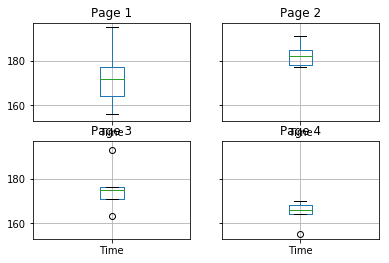

In [6]:
%matplotlib inline
pages_group.boxplot()

In [7]:
# Access The values of a group
page1 = pages_group.get_group('Page 1')['Time'].get_values()
page2 = pages_group.get_group('Page 2')['Time'].get_values()
page3 = pages_group.get_group('Page 3')['Time'].get_values()
page4 = pages_group.get_group('Page 4')['Time'].get_values()

In [8]:
# https://pythonfordatascience.org/anova-python/
# I think this is producing the f-stat gtgv 
f_oneway(page1, page2, page3, page4)

F_onewayResult(statistic=2.7398253419014669, pvalue=0.077586215258014596)

# Chi Square 

Pg. 114

In [9]:
headline_data = web_data = os.path.join(raw_data_loc, 'click_rates.csv')
headline_df = pd.read_csv(headline_data)

In [10]:
headline_df.describe()

,Rate
count,6.000000
mean,500.000000
std,535.314487
min,8.000000
25%,12.500000
50%,500.000000
75%,987.500000
max,992.000000


In [11]:
headline_df.head()

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12


In [20]:
clicks = headline_df[headline_df.Click == 'Click']['Rate']
clicks_chi_sq = chisquare(clicks)
print(clicks_chi_sq)

Power_divergenceResult(statistic=1.6470588235294115, pvalue=0.43887992979155488)


In [25]:
# odds_ratio, pval = fisher_click_results = fisher_exact(clicks)
# print(odds_ratio)
# print(pval)

#pd.crosstab(headline_df)

headline_df['Click_Label'] = np.where(headline_df['Click'] == 'Click', 1, 0)

TypeError: crosstab() missing 1 required positional argument: 'columns'